In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings

In [3]:
data = pd.read_csv('/content/drive/MyDrive/credit.csv')

In [4]:
data

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,IssFraud?
0,1,1,2005,9,6,$16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No
1,1,1,2005,9,9,$224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,NaN,4899,No
2,1,1,2005,9,9,$145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,NaN,4722,No
3,1,1,2005,9,9,$229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No
4,1,1,2005,9,9,$11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691915,1999,4,2019,4,13,$52.42,Chip Transaction,Wright Beauticians,East Elmhurst,NY,11370.0,7230,No
691916,1999,4,2019,4,15,$7.57,Chip Transaction,Bookstore Company 1,Elmhurst,NY,11373.0,5942,No
691917,1999,4,2019,4,15,$7.27,Chip Transaction,Supermarket Chain 1,Elmhurst,NY,11373.0,5411,No
691918,1999,4,2019,4,17,$5.39,Chip Transaction,Acme Souvenirs,East Elmhurst,NY,11370.0,5947,No


In [5]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
MerchantState    73784
Zip              77856
dtype: int64


In [6]:
data.isnull().any()

User             False
Card             False
Year             False
Month            False
Day              False
Amount           False
UseChip          False
MerchantName     False
MerchantCity     False
MerchantState     True
Zip               True
MCC              False
IssFraud?        False
dtype: bool

In [7]:
independent=data[['User', 'Card', 'Year', 'Month', 'Day','UseChip',
       'MerchantName', 'MerchantCity', 'MerchantState', 'Zip', 'MCC']]

dependent=data[['IssFraud?']]
print(independent)

        User  Card  Year  Month  Day             UseChip  \
0          1     1  2005      9    6   Swipe Transaction   
1          1     1  2005      9    9  Online Transaction   
2          1     1  2005      9    9  Online Transaction   
3          1     1  2005      9    9   Swipe Transaction   
4          1     1  2005      9    9   Swipe Transaction   
...      ...   ...   ...    ...  ...                 ...   
691915  1999     4  2019      4   13    Chip Transaction   
691916  1999     4  2019      4   15    Chip Transaction   
691917  1999     4  2019      4   15    Chip Transaction   
691918  1999     4  2019      4   17    Chip Transaction   
691919  1999     4  2019      4   24    Chip Transaction   

                          MerchantName   MerchantCity MerchantState      Zip  \
0                   Ross Package Store        Berkley            MI  48072.0   
1           Digital Delivery Company 7         ONLINE           NaN      NaN   
2             Travel Booking Company 4 

In [8]:
def quanQual(df):
    quan=[]
    qual=[]
    for columnName in df.columns:
    #print(columnName)
        if(df[columnName].dtypes=='O'):
        #print("qual")
            qual.append(columnName)
        else:
        #print("quan")
             quan.append(columnName)
    return quan,qual

In [9]:
quan,qual=quanQual(data)

In [10]:
quan

['User', 'Card', 'Year', 'Month', 'Day', 'Zip', 'MCC']

In [11]:
qual

['Amount',
 'UseChip',
 'MerchantName',
 'MerchantCity',
 'MerchantState',
 'IssFraud?']

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean",copy=True)
imp.fit(data[quan])
datan=imp.transform(data[quan])

In [13]:
datan

array([[1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        6.00000000e+00, 4.80720000e+04, 5.92100000e+03],
       [1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        9.00000000e+00, 5.16946769e+04, 4.89900000e+03],
       [1.00000000e+00, 1.00000000e+00, 2.00500000e+03, ...,
        9.00000000e+00, 5.16946769e+04, 4.72200000e+03],
       ...,
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        1.50000000e+01, 1.13730000e+04, 5.41100000e+03],
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        1.70000000e+01, 1.13700000e+04, 5.94700000e+03],
       [1.99900000e+03, 4.00000000e+00, 2.01900000e+03, ...,
        2.40000000e+01, 1.13700000e+04, 7.54200000e+03]])

In [14]:
datan=pd.DataFrame(datan,columns=quan)

In [15]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp.fit(data[qual])
datal=imp.transform(data[qual])

In [16]:
datal

array([['$16.68', 'Swipe Transaction', 'Ross Package Store', 'Berkley',
        'MI', 'No'],
       ['$224.70', 'Online Transaction', 'Digital Delivery Company 7',
        'ONLINE', 'CA', 'No'],
       ['$145.61', 'Online Transaction', 'Travel Booking Company 4',
        'ONLINE', 'CA', 'No'],
       ...,
       ['$7.27', 'Chip Transaction', 'Supermarket Chain 1', 'Elmhurst',
        'NY', 'No'],
       ['$5.39', 'Chip Transaction', 'Acme Souvenirs', 'East Elmhurst',
        'NY', 'No'],
       ['$15.59', 'Chip Transaction', 'Fox East Elmhurst Car Cleaners',
        'East Elmhurst', 'NY', 'No']], dtype=object)

In [17]:
datal=pd.DataFrame(datal,columns=qual)

In [18]:
data=pd.concat([datan,datal],axis=1)

In [19]:
new=data.to_csv("Dataset_Preprocessed.csv",index=False)

In [20]:
newdata=pd.read_csv("Dataset_Preprocessed.csv")

In [21]:
data = pd.read_csv('Dataset_Preprocessed.csv')

In [22]:
data['Amount'] = data['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['UseChip', 'MerchantName', 'MerchantCity', 'MerchantState','IssFraud?']
for i in col:
    data[i] = le.fit_transform(data[i]).astype(int)

In [24]:
data

,User,Card,Year,Month,Day,Zip,MCC,Amount,UseChip,MerchantName,MerchantCity,MerchantState,IssFraud?
0,1.0,1.0,2005.0,9.0,6.0,48072.000000,5921.0,16.68,2,25645,486,64,0
1,1.0,1.0,2005.0,9.0,9.0,51694.676895,4899.0,224.70,1,7708,4659,15,0
2,1.0,1.0,2005.0,9.0,9.0,51694.676895,4722.0,145.61,1,28101,4659,15,0
3,1.0,1.0,2005.0,9.0,9.0,48111.000000,3405.0,229.21,2,5087,445,64,0
4,1.0,1.0,2005.0,9.0,9.0,48075.000000,5411.0,11.00,2,27440,6118,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691915,1999.0,4.0,2019.0,4.0,13.0,11370.000000,7230.0,52.42,0,29350,1810,79,0
691916,1999.0,4.0,2019.0,4.0,15.0,11373.000000,5942.0,7.57,0,3808,1977,79,0
691917,1999.0,4.0,2019.0,4.0,15.0,11373.000000,5411.0,7.27,0,27438,1977,79,0
691918,1999.0,4.0,2019.0,4.0,17.0,11370.000000,5947.0,5.39,0,310,1810,79,0


In [25]:
col_del = ['User','Card','Zip','Day']

In [26]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(691920, 9)

In [27]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(691920, 9)

In [28]:
X= tr_data.drop(['IssFraud?'], axis = 'columns')
Label_Data = tr_data['IssFraud?']

In [29]:
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['IssFraud?'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['IssFraud?'] == label)[0]

Counter({0: 691048, 1: 872})


In [30]:
!pip install imblearn

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['IssFraud?'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 691048, 1: 691048})


In [32]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)



In [35]:
X_train.shape

(967467, 8)

In [36]:

X_test.shape


(414629, 8)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)

In [40]:
nb_accuracy = accuracy_score(y_test, nb_pred)

In [41]:
print(nb_accuracy)

0.6790046041159687


In [42]:
from imblearn.under_sampling import RandomUnderSampler
ros=RandomUnderSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(independent,dependent)

In [43]:
x_ros

,User,Card,Year,Month,Day,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC
0,1750,0,2015,7,16,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.0,7832
1,1959,1,2016,5,5,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.0,5300
2,182,2,2012,11,23,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.0,5411
3,458,2,2019,5,15,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.0,5411
4,1949,0,2018,1,4,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.0,5499
...,...,...,...,...,...,...,...,...,...,...,...
1739,1998,2,2013,1,26,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,NaN,5921
1740,1999,3,2020,1,26,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.0,5300
1741,1999,3,2020,1,26,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.0,5300
1742,1999,3,2020,1,26,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,MO,63146.0,5812


In [44]:
inn=data[['Year', 'Month', 'UseChip','Amount',
       'MerchantName', 'MerchantCity', 'MerchantState','MCC']]

de=data[['IssFraud?']]

In [45]:
from imblearn.under_sampling import RandomUnderSampler
ros=RandomUnderSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(inn,de)

In [46]:
from sklearn.model_selection import train_test_split
XX_train,XX_test,Y_train,Y_test=train_test_split(x_ros,y_ros,test_size=1/3,random_state=42)

In [47]:
XX_train.shape

(1162, 8)

In [48]:
svm_classifier = SVC()
svm_classifier.fit(XX_train, Y_train)
svm_pred = svm_classifier.predict(XX_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
svm_accuracy = accuracy_score(Y_test, svm_pred)

In [50]:
print(svm_accuracy)

0.6305841924398625


In [51]:
import tensorflow as tf
from tensorflow import keras
ann_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(XX_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [52]:
ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
ann_model.fit(XX_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
33/33 [==============================] - 1s 7ms/step - loss: 94.6597 - accuracy: 0.5502 - val_loss: 58.5196 - val_accuracy: 0.5128
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 27.4839 - accuracy: 0.5943 - val_loss: 37.5746 - val_accuracy: 0.5470
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 26.2232 - accuracy: 0.5866 - val_loss: 6.8985 - val_accuracy: 0.7179
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 13.9176 - accuracy: 0.6258 - val_loss: 4.4280 - val_accuracy: 0.7350
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 11.8937 - accuracy: 0.6297 - val_loss: 8.7979 - val_accuracy: 0.7265
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 16.4710 - accuracy: 0.6354 - val_loss: 29.1790 - val_accuracy: 0.5812
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 16.0115 - accuracy: 0.6278 - val_loss: 10.6134 - val_accuracy: 0.6239
Epoch 8/1

In [54]:
test_loss, test_accuracy = ann_model.evaluate(XX_test, Y_test)
print('\nModel accuracy:', test_accuracy)

19/19 [==============================] - 0s 1ms/step - loss: 17.3859 - accuracy: 0.6203

Model accuracy: 0.6202749013900757


In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.models import Model

In [56]:
np.random.seed(7)

# Assuming X_train and X_test are already numpy arrays
# Reshape input data to be 3D [samples, timesteps, features] (required format for LSTM)
train_LSTM_X = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
val_LSTM_X = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Retrieving the labels
train_LSTM_y = y_train.values
val_LSTM_y = y_test.values

In [57]:
inputs = Input(shape=(1, X_train.shape[1]))
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)
outputs = Dense(1, activation='sigmoid')(x2)
model = Model(inputs, outputs)


In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(train_LSTM_X, train_LSTM_y, epochs=100, batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
49/49 [==============================] - 22s 278ms/step - loss: 0.6753 - accuracy: 0.6229 - val_loss: 0.6427 - val_accuracy: 0.6538
Epoch 2/100
49/49 [==============================] - 14s 284ms/step - loss: 0.6285 - accuracy: 0.6469 - val_loss: 0.5898 - val_accuracy: 0.6909
Epoch 3/100
49/49 [==============================] - 13s 273ms/step - loss: 0.5907 - accuracy: 0.6791 - val_loss: 0.5331 - val_accuracy: 0.7358
Epoch 4/100
49/49 [==============================] - 13s 266ms/step - loss: 0.5647 - accuracy: 0.7025 - val_loss: 0.5041 - val_accuracy: 0.7635
Epoch 5/100
49/49 [==============================] - 12s 244ms/step - loss: 0.5513 - accuracy: 0.7132 - val_loss: 0.4901 - val_accuracy: 0.7709
Epoch 6/100
49/49 [==============================] - 13s 261ms/step - loss: 0.5410 - accuracy: 0.7216 - val_loss: 0.4783 - val_accuracy: 0.7768
Epoch 7/100
49/49 [==============================] - 13s 257ms/step - loss: 0.5325 - accuracy: 0.7292 - val_loss: 0.4670 - val_accuracy:

In [60]:
model.save('Save_Model.h5')
print("Saved model to disk")


Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 8)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 50)             11800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32051 (125.20 KB)
Trainable params: 32051 (125.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [64]:
# Convert probabilities to binary labels using a threshold of 0.5
yhat_labels = (yhat_probs > 0.5).astype(int)


In [65]:
accuracy = accuracy_score(val_LSTM_y, yhat_labels)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_labels)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_labels)
print('Recall: %f' % recall)

Accuracy: 0.875814
Precision: 0.838452
Recall: 0.931250


In [66]:
import joblib

# Assuming you have already trained a model named 'model'
# Save the model to a file
joblib.dump(model, 'frauddetection.pkl')

['frauddetection.pkl']

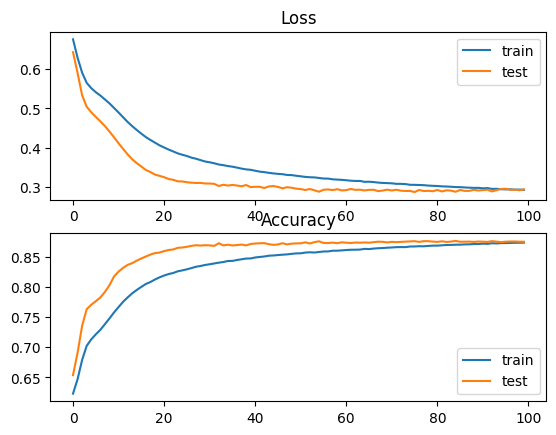

In [67]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [68]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [69]:
inputs1=Input((1,X_train.shape[1]))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [70]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
history1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=30000, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/100
33/33 [==============================] - 25s 491ms/step - loss: 0.6821 - accuracy: 0.5971 - val_loss: 0.6623 - val_accuracy: 0.6456
Epoch 2/100
33/33 [==============================] - 14s 425ms/step - loss: 0.6484 - accuracy: 0.6315 - val_loss: 0.6206 - val_accuracy: 0.6666
Epoch 3/100
33/33 [==============================] - 15s 450ms/step - loss: 0.6202 - accuracy: 0.6549 - val_loss: 0.5862 - val_accuracy: 0.6950
Epoch 4/100
33/33 [==============================] - 13s 392ms/step - loss: 0.5939 - accuracy: 0.6765 - val_loss: 0.5467 - val_accuracy: 0.7218
Epoch 5/100
33/33 [==============================] - 13s 386ms/step - loss: 0.5740 - accuracy: 0.6961 - val_loss: 0.5180 - val_accuracy: 0.7539
Epoch 6/100
33/33 [==============================] - 13s 384ms/step - loss: 0.5619 - accuracy: 0.7071 - val_loss: 0.5032 - val_accuracy: 0.7724
Epoch 7/100
33/33 [==============================] - 12s 376ms/step - loss: 0.5524 - accuracy: 0.7143 - val_loss: 0.4919 - val_accuracy:

In [72]:
yhat_probss = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probss = yhat_probss[:, 0]

In [73]:
yhat_labelss = (yhat_probss > 0.5).astype(int)


In [74]:
accuracy1 = accuracy_score(val_LSTM_y, yhat_labelss)
print('Accuracy: %f' % accuracy1)

# precision tp / (tp + fp)
precision1 = precision_score(val_LSTM_y, yhat_labelss)
print('Precision: %f' % precision1)

# recall: tp / (tp + fn)
recall1 = recall_score(val_LSTM_y, yhat_labelss)
print('Recall: %f' % recall1)

Accuracy: 0.875814
Precision: 0.838452
Recall: 0.931250


In [80]:
classifiers = [ 'Naive Bayes', 'SVM', 'LSTM', 'LSTM-Attension','ANN']
accuracies = [nb_accuracy,svm_accuracy,accuracy,accuracy1,test_accuracy]

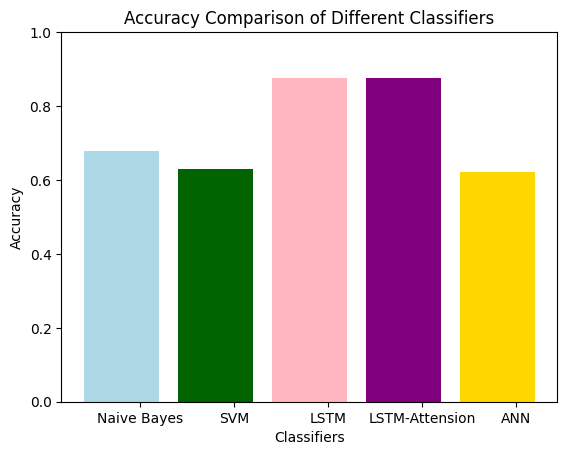

In [81]:
bar_width=0.2
positionss = np.arange(len(classifiers))
colors = ['#ADD8E6', '#006400', '#FFB6C1', '#800080','#FFD700' ]
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.xticks(positionss + bar_width)
plt.ylim(0, 1)
plt.show()